### Kenny Courser Fall 2022

In [577]:
# 1a)
import numpy as np
A=list(range(1,53,1))
B=[39,46,41,42,31,44,33,42,31,28,36,40,33,45,42,28,34,42,45,37,39,35,28,30,24,40,22,46,37,37,38,36,41,38,42,43,30,45,46,51,55,36,42,44,36,44,41,38,38,56,39,40]
C=list(zip(A,B))
N1=np.linspace(25,50)
N2=np.linspace(25,50)
N=np.array(C)
M = [[x,y] for x in N1 for y in N2]
N3=np.linspace(1,52,num=52)
#M=[[x,y,z] for x in N1 for y in N2 for z in N3]
#M=np.array(M)

L=[0]*53
for i in range (0,2500):
    k=0
    while k<53:
        prob=1
        for j in range(0,52):
            if j<k:
                prob=prob*(M[i][0]**N[j][1]*np.exp(-M[i][0])/np.math.factorial(N[j][1]))
            if j>=k:
                prob=prob*(M[i][1]**N[j][1]*np.exp(-M[i][1])/np.math.factorial(N[j][1]))
        print(prob,k,i)
#        if prob>2.35
        L[k]=L[k]+prob
        k=k+1
#print(L)

# Each value above represents a (unnormalized) value P($\theta$) in the space of possible triples $(\lambda_1,\lambda_2,W_s)$.

In [203]:
import random
def reasonable_function(l1,l2,n):
    for i in range (1,n):
        l1=(l1+random.randrange(-1,2,1))%50
        l2=(l2+random.randrange(-1,2,1))%50
        print(l1,l2)

In [204]:
reasonable_function(20,20,1000)

In [525]:
L=[0]*2500
for i in range (0,2500):
#    prob=1
    k=0
    while k<53:
        prob=1
        for j in range(0,52):
            if j<k:
                prob=prob*(M[i][0]**N[j][1]*np.exp(-M[i][0])/np.math.factorial(N[j][1]))
            if j>=k:
                prob=prob*(M[i][1]**N[j][1]*np.exp(-M[i][1])/np.math.factorial(N[j][1]))
        L[i]=L[i]+prob
        print(prob,k,i)
        k=k+1
#    L[i]=prob
print(L)

In [ ]:
L

# Each value above represents the (unnormalized) probability of a particular lambda pair ($\lambda_1,\lambda_2$) occurring at any point during the year.

In [671]:
import random
S=[]
def reasonable_function(i,l,n): 
#    F=10**(-200)
    for a in range (1,n):
        k=0
        L=0
        while k<53:
            prob=1
            for j in range(0,52):
                if j<k:
                    prob=prob*(N1[i]**N[j][1]*np.exp(-N1[i])/np.math.factorial(N[j][1]))
                if j>=k:
                    prob=prob*(N2[l]**N[j][1]*np.exp(-N2[l])/np.math.factorial(N[j][1]))
            L=L+prob
#            print(prob,k,i,L)
            k=k+1
#        print(prob,i,L)
        I=(i+random.randrange(-1,2,1))%50
        J=(l+random.randrange(-1,2,1))%50
        k=0
        F=0
        while k<53:
            prob=1
            for j in range(0,52):
                if j<k:
                    prob=prob*(N1[I]**N[j][1]*np.exp(-N1[I])/np.math.factorial(N[j][1]))
                if j>=k:
                    prob=prob*(N2[J]**N[j][1]*np.exp(-N2[J])/np.math.factorial(N[j][1]))
            F=F+prob
#            print(prob,k,i,L)
            k=k+1
        r=random.uniform(0,1)
#        I=(i+random.randrange(-1,2,1))%50
#        J=(l+random.randrange(-1,2,1))%50
        print(L,F,r)
        if F/L>r:
#            F=L
            print(L,N1[i],N2[l],F,N1[I],N2[J])
            S.append([N1[i],N2[l]])
            i=I
            l=J
#        else:
#            i=(i+random.randrange(-1,2,1))%50
#            l=(l+random.randrange(-1,2,1))%50
#            S.append([N1[i],N2[l]]

In [683]:
reasonable_function(10,10,2000)

In [ ]:
S,len(S)

# Above values are converging to the most likely lambda pair.

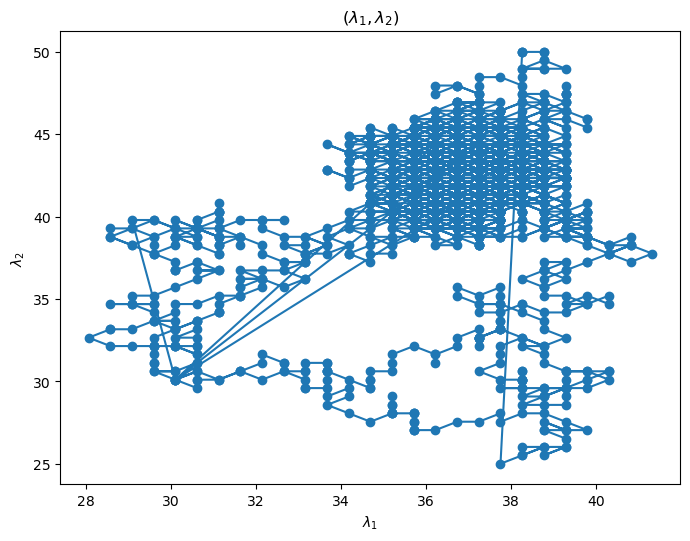

In [685]:
Q=[0]*len(S)
V=[0]*len(S)
for i in range (0,len(S)):
    Q[i]=S[i][0]
    V[i]=S[i][1]
x = Q
y = V
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.plot(x, y, linestyle="-", marker="o")
plt.title('($\lambda_1,\lambda_2$)')
plt.xlabel('$\lambda_1$')
plt.ylabel('$\lambda_2$')

plt.show()

# A higher number of iterations causes a higher buildup around ~(37.5,43)ish. Changes in the initial values of $\lambda_1$ and $\lambda_2$ cause a bit more time before getting to the large cluster but not too much time, relatively speaking for a large number of iterations.

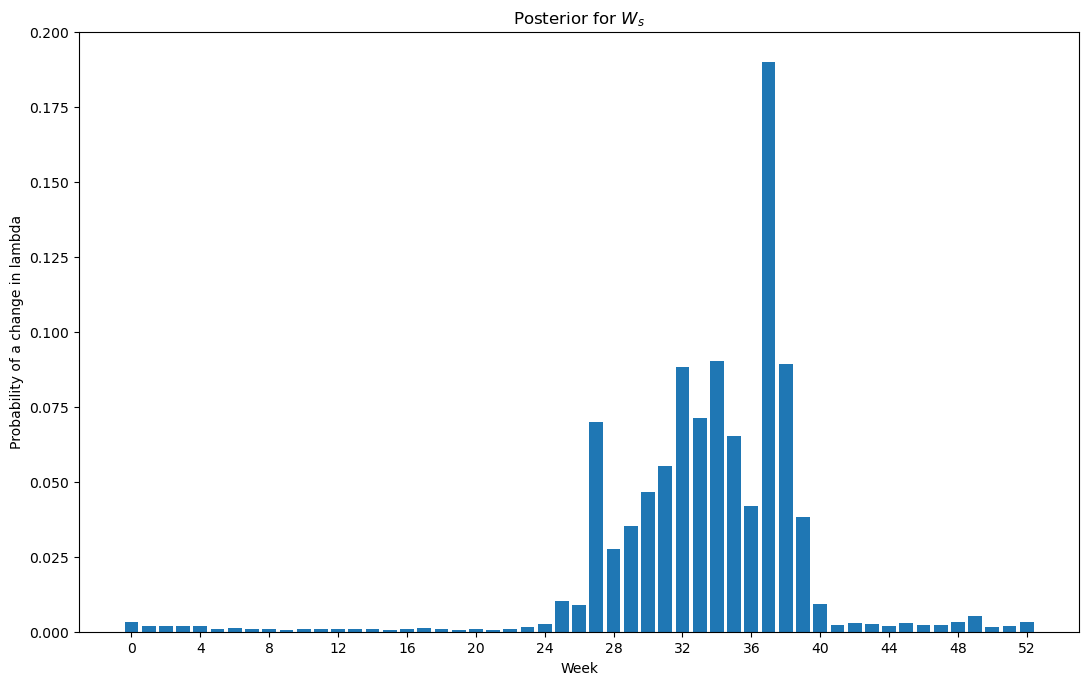

In [572]:
week=[]
for i in range(0,53):
    week.append(i)
probability = []
for i in range(0,53):
    probability.append(L[i])

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(week,probability)
#ax.bar(week,probabilityR)
ax.set_xlabel('Week')
ax.set_ylabel('Probability of a change in lambda')
ax.set_title('Posterior for $W_s$')
#plt.title("Posterior for $W_s$")
plt.xticks(np.arange(0.0, 53.0, 4.0))
plt.yticks(np.arange(0.0, .225, .025))

#plt.bar(week, probabilityR, bottom=probabilityR, color='b')
#plt.bar(week, probability, color='r')
#y_avg = [weekly_average] * 52
#ax.plot(weeks, y_avg, color='red', lw=2, ls='--', label="average plot")


plt.show()

In [612]:
L=[0]*50
for i in range (0,2500):
#    prob=1
    k=0
    while k<53:
        prob=1
        for j in range(0,52):
            if j<k:
                prob=prob*(M[i][0]**N[j][1]*np.exp(-M[i][0])/np.math.factorial(N[j][1]))
            if j>=k:
                prob=prob*(M[i][1]**N[j][1]*np.exp(-M[i][1])/np.math.factorial(N[j][1]))
        I=i//50
        L[I]=L[I]+prob
        print(prob,k,i,I)
        k=k+1
#    L[i]=prob
print(L)

In [ ]:
L

In [ ]:
sumL=0
for i in range (0,50):
    sumL=sumL+L[i]
print(sumL)
for i in range (0,50):
    L[i]=L[i]/sumL
L

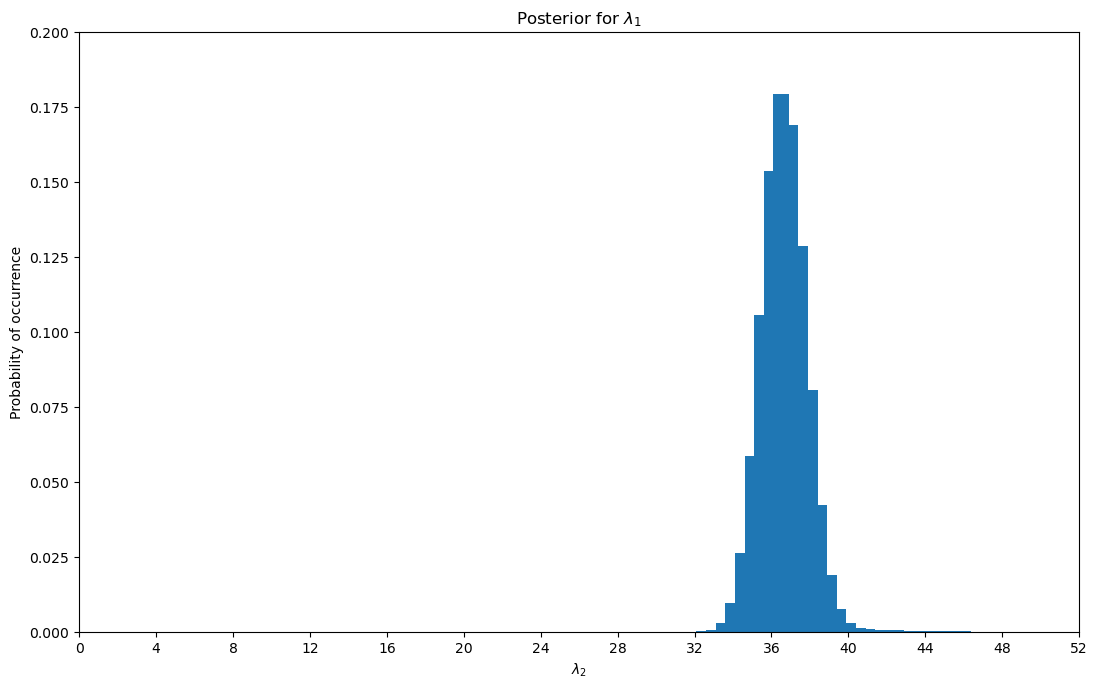

In [616]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(A,L)
#ax.bar(week,probabilityR)
ax.set_xlabel('$\lambda_2$')
ax.set_ylabel('Probability of occurrence')
ax.set_title('Posterior for $\lambda_1$')
#plt.title("Posterior for $W_s$")
plt.xticks(np.arange(0.0, 53.0, 4.0))
plt.yticks(np.arange(0.0, .225, .025))

#plt.bar(week, probabilityR, bottom=probabilityR, color='b')
#plt.bar(week, probability, color='r')
#y_avg = [weekly_average] * 52
#ax.plot(weeks, y_avg, color='red', lw=2, ls='--', label="average plot")


plt.show()

In [607]:
L=[0]*50
for i in range (0,2500):
#    prob=1
    k=0
    while k<53:
        prob=1
        for j in range(0,52):
            if j<k:
                prob=prob*(M[i][0]**N[j][1]*np.exp(-M[i][0])/np.math.factorial(N[j][1]))
            if j>=k:
                prob=prob*(M[i][1]**N[j][1]*np.exp(-M[i][1])/np.math.factorial(N[j][1]))
        I=i%50
        L[I]=L[I]+prob
        print(prob,k,i,I)
        k=k+1
#    L[i]=prob
print(L)

In [ ]:
L

In [ ]:
sumL=0
for i in range (0,50):
    sumL=sumL+L[i]
print(sumL)
for i in range (0,50):
    L[i]=L[i]/sumL
L

In [ ]:
A=[]
for i in range (0,50):
    A.append(25+i/2)
A

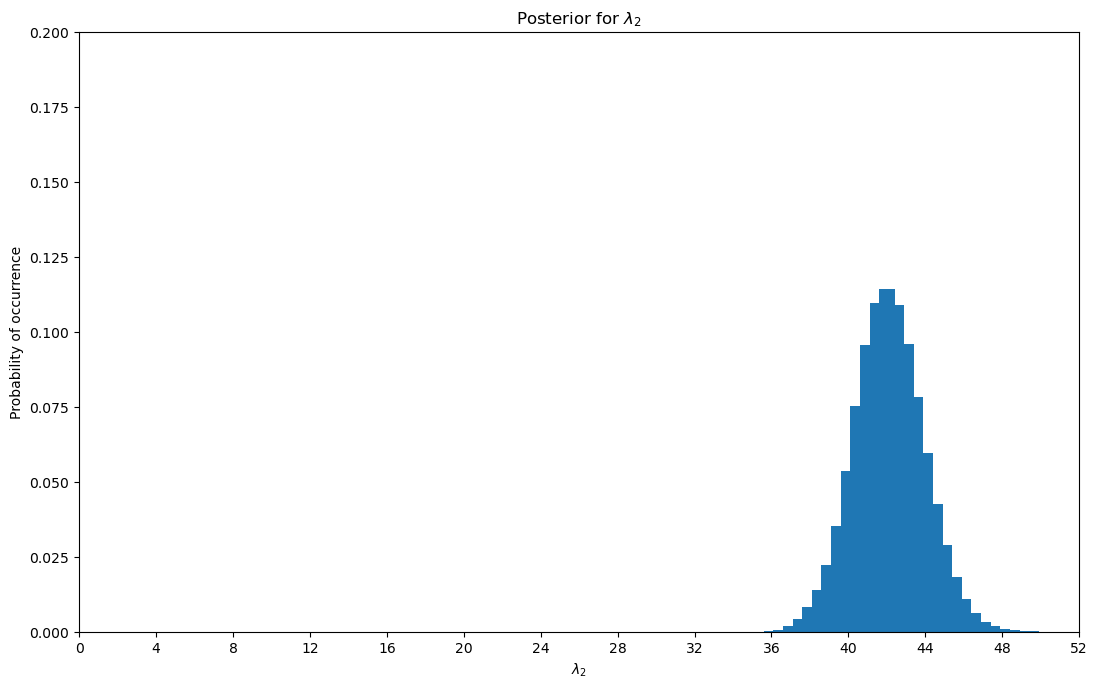

In [611]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(A,L)
#ax.bar(week,probabilityR)
ax.set_xlabel('$\lambda_2$')
ax.set_ylabel('Probability of occurrence')
ax.set_title('Posterior for $\lambda_2$')
#plt.title("Posterior for $W_s$")
plt.xticks(np.arange(0.0, 53.0, 4.0))
plt.yticks(np.arange(0.0, .225, .025))

#plt.bar(week, probabilityR, bottom=probabilityR, color='b')
#plt.bar(week, probability, color='r')
#y_avg = [weekly_average] * 52
#ax.plot(weeks, y_avg, color='red', lw=2, ls='--', label="average plot")


plt.show()

In [578]:
# 1c)

R=[0]*53
for i in range (0,2500):
    k=0
    while k<53:
        prob=1
        for j in range(0,52):
            if j<k:
                prob=prob*(M[i][0]**N[j][1]*np.exp(-M[i][0])/np.math.factorial(N[j][1]))
            if j>=k:
                prob=prob*(M[i][1]**N[j][1]*np.exp(-M[i][1])/np.math.factorial(N[j][1]))
        print(prob,k,i)
        if (M[i][1]-M[i][0])>5:
            R[k]=R[k]+prob
        k=k+1

In [ ]:
R

In [580]:
sumL=0
for i in range (0,53):
    sumL=sumL+L[i]
    
sumR=0
for i in range (0,53):
    sumR=sumR+R[i]
print(sumR)
print(sumL)
print(sumR/sumL)

6.149845101540514e-72
9.476299539814625e-72
0.648971159649605


# P($(\lambda_2-\lambda_1)>5$)~.6489

In [1]:
# 2a)

# Suppose we are in 2-dimensional Euclidean space. We start with k centers, which I will assume comes in the form of a kx2
# (k rows, 2 columns) array K with each row representing a center.

# Next suppose we are given a collection of n data points in an nx2 array called D. This is the data that we want to cluster
# around the k centers (points of K).

# Given a point d=(x,y) of D, to find which element of K we associate it with, we simply calculate the distance to each point
# in K and take the smallest.

## for i in D:
##     for j in K:
##         calculate dist(d_i,k_j)
##         store above value in a list
##     print list
##     take smallest value in list
##     append point d_i to a list associated with the points that are closest to center k_j

# This partitions the data D into subsets D1,...,Dm where m<=k. Some of the k centers may not be the nearest of any data points.

# For each partiton Ds, calculate the centroid cs. This gives us new centers in an mX2 array K'.

# Repeat from second step until centers converge.

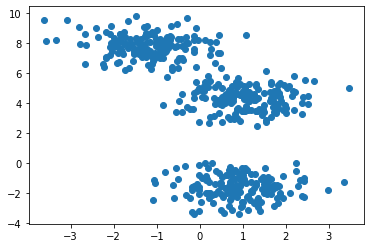

In [3]:
import numpy as np
from sklearn.datasets import make_blobs
X,Y = make_blobs(n_samples=500, cluster_std=0.8, centers=3, n_features=3, random_state=0)
import matplotlib.pylab as plt
plt.scatter(X[:,0],X[:,1])

In [11]:
# 2b)
X,Y

(array([[ 0.02913978, -2.54171761,  2.29810053],
        [-1.85231334,  8.58471243,  9.80638983],
        [ 0.96381813, -0.70884929,  1.73464089],
        ...,
        [-1.45306004,  8.26962677,  9.54176377],
        [-0.01124477, -3.19260781,  1.5956487 ],
        [ 1.02972821, -1.04955379,  3.52650834]]),
 array([1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2, 0, 0, 0,
        2, 1, 0, 1, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2,
        2, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2,
        1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 2, 0, 2,
        1, 1, 2, 2, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 2, 0, 2, 0, 1, 0, 1, 0,
        0, 2, 0, 1, 1, 2, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 1, 0, 1, 2,
        1, 0, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 1, 2, 0, 2, 1, 2, 2,
        0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1,
        1, 0, 0, 0, 1, 2, 1, 1, 2, 1, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 0, 0,
        0, 1, 0, 2, 1, 1,

In [49]:
#K=[]
#for i in range (-4,5):
#    for j in range (-4,11):
#        K.append([i,j])
#print(K)
#K=[[-2,0],[0,0],[2,0],[-2,4],[0,4],[2,4],[-2,8],[0,8],[2,8]]
K=[[-1,8],[1,4],[1,-2]]
print(K)

[[-1, 8], [1, 4], [1, -2]]


# These^ will be our candidates for centers.

In [50]:
Z=[]
for i in range (0,len(X)):
    Z.append([X[i][0],X[i][1]])
print(Z)

[[0.029139778741392508, -2.5417176059965123], [-1.8523133416141135, 8.584712430350038], [0.9638181313739699, -0.7088492899260834], [-0.6876698678100607, 8.488246269129005], [1.8670224270373126, -2.120719443358572], [-1.9060080667781325, 7.334179516213951], [1.0394527206587045, 4.948653192933849], [-1.0422133891865741, -1.3247157164992853], [0.8400780296984054, -1.4719816305853015], [0.04857519824665102, -0.9867973703271653], [1.5737173023144244, -1.994256390093037], [-1.7422598196777865, 8.032639169797454], [-1.343444218182398, 7.083408922525125], [0.6757893006562523, -1.9046130276254576], [-0.5262240274558954, 6.806908464944278], [-0.4771480543388824, 4.153375408200422], [0.9968726822702539, -0.7985873501657862], [0.300806706809032, -2.633583511375905], [0.12951838862587373, 8.204299590198517], [0.18414196453823206, 5.801702590269129], [0.1076296021659926, 4.815576123396768], [0.2337427308903246, 5.496364861015609], [-1.766173595558087, 7.974844296172645], [0.972955144928021, -1.22127

# This^ is our 2-dimensional data.

In [51]:
import math
#K=[[-2,0],[0,0],[2,0],[-2,4],[0,4],[2,4],[-2,8],[0,8],[2,8]]
K=[[-1,8],[1,4],[1,-2]]
G=[]
for i in range (0,len(Z)):                   
    L=[]
    for j in range (0,len(K)):
        d=math.dist(Z[i],K[j])
        L.append(d)
        s=L.index(min(L))
    G.append([Z[i],K[s]])
print(G,len(G))

[[[0.029139778741392508, -2.5417176059965123], [1, -2]], [[-1.8523133416141135, 8.584712430350038], [-1, 8]], [[0.9638181313739699, -0.7088492899260834], [1, -2]], [[-0.6876698678100607, 8.488246269129005], [-1, 8]], [[1.8670224270373126, -2.120719443358572], [1, -2]], [[-1.9060080667781325, 7.334179516213951], [-1, 8]], [[1.0394527206587045, 4.948653192933849], [1, 4]], [[-1.0422133891865741, -1.3247157164992853], [1, -2]], [[0.8400780296984054, -1.4719816305853015], [1, -2]], [[0.04857519824665102, -0.9867973703271653], [1, -2]], [[1.5737173023144244, -1.994256390093037], [1, -2]], [[-1.7422598196777865, 8.032639169797454], [-1, 8]], [[-1.343444218182398, 7.083408922525125], [-1, 8]], [[0.6757893006562523, -1.9046130276254576], [1, -2]], [[-0.5262240274558954, 6.806908464944278], [-1, 8]], [[-0.4771480543388824, 4.153375408200422], [1, 4]], [[0.9968726822702539, -0.7985873501657862], [1, -2]], [[0.300806706809032, -2.633583511375905], [1, -2]], [[0.12951838862587373, 8.20429959019851

# This^ is our 2-dimensional data tagged with its nearest initial center.

In [56]:
import math
#K=[[-2,0],[0,0],[2,0],[-2,4],[0,4],[2,4],[-2,8],[0,8],[2,8]]
K=[[-1,8],[1,4],[1,-2]]
for a in range (1,4):
    G=[]
    for i in range (0,500):                   
        L=[]
        for j in range (0,len(K)):
            d=math.dist(Z[i],K[j])
            L.append(d)
            s=L.index(min(L))
        G.append([Z[i],K[s]])   # s here is too big
#    print(G,len(G))
    K2=[]
    for k in range(0,len(K)):
        cx=0
        cy=0
        n=0
        for i in range (0,len(G)):
#            if G[i][1][0]==K[k][0] and G[i][1][1]==K[k][1]:
            if G[i][1]==K[k]:
                cx+=G[i][0][0]
                cy+=G[i][0][1]
                n=n+1
        if n>0:
            cx=cx/n
            cy=cy/n
            K2.append([cx,cy])
            print(n,K[k])
    K=K2
print(K2,len(K2))

166 [-1, 8]
167 [1, 4]
167 [1, -2]
165 [-1.1978999361280809, 7.81260773663216]
168 [1.0607093805993433, 4.268872943994808]
167 [0.8928043879228512, -1.60355314260854]
165 [-1.208157342199779, 7.821441722625231]
168 [1.057339515629717, 4.2812903672315965]
167 [0.8928043879228512, -1.60355314260854]
[[-1.208157342199779, 7.821441722625231], [1.057339515629717, 4.2812903672315965], [0.8928043879228512, -1.60355314260854]] 3


# These are the centroids of each cluster and the number of points in each cluster.

In [ ]:
# 2c)

# I Googled this and this was the best (in my opinion) result that I came across:

# We calculate the "Silhouette Coefficient" s of each point, which is defined by

# s=(b-a)/max(b,a)

# where a is the mean distance between a point and all other points in the same cluster, and b is the mean distance between a point and all other points in the next nearest cluster.

# Then, the silhouette coefficient of a set of data is defined as the mean of the silhouette coeffients of its points. Good silhouette coefficients are close to 1.

In [ ]:
# 2d)
import math
K=[[-1,8],[1,4],[1,-2]]
for a in range (1,2):
    G=[]
    for i in range (0,500):                   
        L=[]
        for j in range (0,len(K)):
            d=math.dist(Z[i],K[j])
            L.append(d)
            s=L.index(min(L))
        G.append([Z[i],K[s]])
#    print(G,len(G))
    F=[0,0,0]
    for k in range(0,len(K)):
        K2=[]
        for i in range (0,len(G)):
            if G[i][1]==K[k]:
                K2.append(G[i][0])
        for j in range (0,len(K2)):
            s=0
            for l in range(0,len(K2)):
                s=s+math.dist(K2[j],K2[l])
            print(K2[j],s/len(K2))
        F[k]=K2
        print('end cluster')
#        print(K2,len(K2))

In [ ]:
F[0],F[1],F[2]

In [ ]:
K01=[]
for i in range (0,len(F[0])):
    s=0
    for j in range (0,len(F[1])):
        s=s+math.dist(F[0][i],F[1][j])
    print(F[0][i],s/len(F[1]))
    K01.append(s/len(F[1]))
print('end cluster 0/cluster 1 comparison')
    
K10=[]
for i in range (0,len(F[1])):
    s=0
    for j in range (0,len(F[0])):
        s=s+math.dist(F[1][i],F[0][j])
    print(F[1][i],s/len(F[0]))
    K10.append(s/len(F[0]))
print('end cluster 1/cluster 0 comparison')

K21=[]
for i in range (0,len(F[2])):
    s=0
    for j in range (0,len(F[1])):
        s=s+math.dist(F[2][i],F[1][j])
    print(F[2][i],s/len(F[1]))
    K21.append(s/len(F[1]))
print('end cluster 2/cluster 1 comparison')

K00=[]
for i in range (0,len(F[0])):
    s=0
    for j in range (0,len(F[0])):
        s=s+math.dist(F[0][i],F[0][j])
    print(F[0][i],s/len(F[0]))
    K00.append(s/len(F[0]))
print('end cluster 0 self-comparison')

K11=[]
for i in range (0,len(F[1])):
    s=0
    for j in range (0,len(F[1])):
        s=s+math.dist(F[1][i],F[1][j])
    print(F[1][i],s/len(F[1]))
    K11.append(s/len(F[1]))
print('end cluster 1 self-comparison')

K22=[]
for i in range (0,len(F[2])):
    s=0
    for j in range (0,len(F[2])):
        s=s+math.dist(F[2][i],F[2][j])
    print(F[2][i],s/len(F[2]))
    K22.append(s/len(F[2]))
print('end cluster 2 self-comparison')

In [ ]:
F0=[]
for i in range(0,len(F[0])):
    s=0
    s=(K01[i]-K00[i])/max(K01[i],K00[i])
    F0.append([F[0][i],s])
print(F0)

F1=[]
for i in range(0,len(F[1])):
    s=0
    s=(K10[i]-K11[i])/max(K10[i],K11[i])
    F1.append([F[1][i],s])
print(F1)

F2=[]
for i in range(0,len(F[2])):
    s=0
    s=(K21[i]-K22[i])/max(K21[i],K22[i])
    F2.append([F[2][i],s])
print(F2)

t=0
for j in range(0,len(F0)):
    t=t+F0[j][1]
for j in range(0,len(F1)):
    t=t+F1[j][1]
for j in range(0,len(F2)):
    t=t+F2[j][1]
print(t/(len(F0)+len(F1)+len(F2)))

# The silhouette coefficient for k=3 clusters is s~.705226.

# Let's try with k=2 clusters.

In [ ]:
import math
#K=[[-2,0],[0,0],[2,0],[-2,4],[0,4],[2,4],[-2,8],[0,8],[2,8]]
K=[[0,6],[1,-2]]
G=[]
for i in range (0,len(Z)):                   
    L=[]
    for j in range (0,len(K)):
        d=math.dist(Z[i],K[j])
        L.append(d)
        s=L.index(min(L))
    G.append([Z[i],K[s]])
print(G,len(G))

In [134]:
import math
#K=[[-2,0],[0,0],[2,0],[-2,4],[0,4],[2,4],[-2,8],[0,8],[2,8]]
K=[[0,6],[1,-2]]
for a in range (1,4):
    G=[]
    for i in range (0,500):                   
        L=[]
        for j in range (0,len(K)):
            d=math.dist(Z[i],K[j])
            L.append(d)
            s=L.index(min(L))
        G.append([Z[i],K[s]])   # s here is too big
#    print(G,len(G))
    K2=[]
    for k in range(0,len(K)):
        cx=0
        cy=0
        n=0
        for i in range (0,len(G)):
#            if G[i][1][0]==K[k][0] and G[i][1][1]==K[k][1]:
            if G[i][1]==K[k]:
                cx+=G[i][0][0]
                cy+=G[i][0][1]
                n=n+1
        if n>0:
            cx=cx/n
            cy=cy/n
            K2.append([cx,cy])
            print(n,K[k])
    K=K2
print(K2,len(K2))

333 [0, 6]
167 [1, -2]
333 [-0.0652039724839971, 6.035419417201408]
167 [0.8928043879228512, -1.60355314260854]
333 [-0.0652039724839971, 6.035419417201408]
167 [0.8928043879228512, -1.60355314260854]
[[-0.0652039724839971, 6.035419417201408], [0.8928043879228512, -1.60355314260854]] 2


In [ ]:
import math
K=[[0,6],[1,-2]]
for a in range (1,2):
    G=[]
    for i in range (0,500):                   
        L=[]
        for j in range (0,len(K)):
            d=math.dist(Z[i],K[j])
            L.append(d)
            s=L.index(min(L))
        G.append([Z[i],K[s]])
#    print(G,len(G))
    F=[0,0,0]
    for k in range(0,len(K)):
        K2=[]
        for i in range (0,len(G)):
            if G[i][1]==K[k]:
                K2.append(G[i][0])
        for j in range (0,len(K2)):
            s=0
            for l in range(0,len(K2)):
                s=s+math.dist(K2[j],K2[l])
            print(K2[j],s/len(K2))
        F[k]=K2
        print('end cluster')
#        print(K2,len(K2))

In [ ]:
F[0],F[1]

In [ ]:
K01=[]
for i in range (0,len(F[0])):
    s=0
    for j in range (0,len(F[1])):
        s=s+math.dist(F[0][i],F[1][j])
    print(F[0][i],s/len(F[1]))
    K01.append(s/len(F[1]))
print('end cluster 0/cluster 1 comparison')
    
K10=[]
for i in range (0,len(F[1])):
    s=0
    for j in range (0,len(F[0])):
        s=s+math.dist(F[1][i],F[0][j])
    print(F[1][i],s/len(F[0]))
    K10.append(s/len(F[0]))
print('end cluster 1/cluster 0 comparison')

K00=[]
for i in range (0,len(F[0])):
    s=0
    for j in range (0,len(F[0])):
        s=s+math.dist(F[0][i],F[0][j])
    print(F[0][i],s/len(F[0]))
    K00.append(s/len(F[0]))
print('end cluster 0 self-comparison')

K11=[]
for i in range (0,len(F[1])):
    s=0
    for j in range (0,len(F[1])):
        s=s+math.dist(F[1][i],F[1][j])
    print(F[1][i],s/len(F[1]))
    K11.append(s/len(F[1]))
print('end cluster 1 self-comparison')

In [ ]:
F0=[]
for i in range(0,len(F[0])):
    s=0
    s=(K01[i]-K00[i])/max(K01[i],K00[i])
    F0.append([F[0][i],s])
print(F0)

F1=[]
for i in range(0,len(F[1])):
    s=0
    s=(K10[i]-K11[i])/max(K10[i],K11[i])
    F1.append([F[1][i],s])
print(F1)

t=0
for j in range(0,len(F0)):
    t=t+F0[j][1]
for j in range(0,len(F1)):
    t=t+F1[j][1]
print(t/(len(F0)+len(F1)))

# The silhouette coefficient for k=2 clusters is s~.679291.

# Lastly, let's try with k=4 clusters.

In [ ]:
import math
#K=[[-2,0],[0,0],[2,0],[-2,4],[0,4],[2,4],[-2,8],[0,8],[2,8]]
K=[[-2,8],[0,6],[1,4],[1,-2]]
G=[]
for i in range (0,len(Z)):                   
    L=[]
    for j in range (0,len(K)):
        d=math.dist(Z[i],K[j])
        L.append(d)
        s=L.index(min(L))
    G.append([Z[i],K[s]])
print(G,len(G))

In [ ]:
import math
#K=[[-2,0],[0,0],[2,0],[-2,4],[0,4],[2,4],[-2,8],[0,8],[2,8]]
K=[[-2,8],[0,6],[1,4],[1,-2]]
for a in range (1,40):
    G=[]
    for i in range (0,500):                   
        L=[]
        for j in range (0,len(K)):
            d=math.dist(Z[i],K[j])
            L.append(d)
            s=L.index(min(L))
        G.append([Z[i],K[s]])   # s here is too big
#    print(G,len(G))
    K2=[]
    for k in range(0,len(K)):
        cx=0
        cy=0
        n=0
        for i in range (0,len(G)):
#            if G[i][1][0]==K[k][0] and G[i][1][1]==K[k][1]:
            if G[i][1]==K[k]:
                cx+=G[i][0][0]
                cy+=G[i][0][1]
                n=n+1
        if n>0:
            cx=cx/n
            cy=cy/n
            K2.append([cx,cy])
            print(n,K[k])
    K=K2
print(K2,len(K2))

In [ ]:
import math
K=[[-2,8],[0,6],[1,4],[1,-2]]
for a in range (1,2):
    G=[]
    for i in range (0,500):                   
        L=[]
        for j in range (0,len(K)):
            d=math.dist(Z[i],K[j])
            L.append(d)
            s=L.index(min(L))
        G.append([Z[i],K[s]])
#    print(G,len(G))
    F=[0,0,0,0]
    for k in range(0,len(K)):
        K2=[]
        for i in range (0,len(G)):
            if G[i][1]==K[k]:
                K2.append(G[i][0])
        for j in range (0,len(K2)):
            s=0
            for l in range(0,len(K2)):
                s=s+math.dist(K2[j],K2[l])
            print(K2[j],s/len(K2))
        F[k]=K2
        print('end cluster')
#        print(K2,len(K2))

In [ ]:
F[0],F[1],F[2],F[3]

In [ ]:
K01=[]
for i in range (0,len(F[0])):
    s=0
    for j in range (0,len(F[1])):
        s=s+math.dist(F[0][i],F[1][j])
    print(F[0][i],s/len(F[1]))
    K01.append(s/len(F[1]))
print('end cluster 0/cluster 1 comparison')
    
K10=[]
for i in range (0,len(F[1])):
    s=0
    for j in range (0,len(F[0])):
        s=s+math.dist(F[1][i],F[0][j])
    print(F[1][i],s/len(F[0]))
    K10.append(s/len(F[0]))
print('end cluster 1/cluster 0 comparison')

K21=[]
for i in range (0,len(F[2])):
    s=0
    for j in range (0,len(F[1])):
        s=s+math.dist(F[2][i],F[1][j])
    print(F[2][i],s/len(F[1]))
    K21.append(s/len(F[1]))
print('end cluster 2/cluster 1 comparison')

K32=[]
for i in range (0,len(F[3])):
    s=0
    for j in range (0,len(F[2])):
        s=s+math.dist(F[3][i],F[2][j])
    print(F[3][i],s/len(F[2]))
    K32.append(s/len(F[2]))
print('end cluster 3/cluster 2 comparison')

K00=[]
for i in range (0,len(F[0])):
    s=0
    for j in range (0,len(F[0])):
        s=s+math.dist(F[0][i],F[0][j])
    print(F[0][i],s/len(F[0]))
    K00.append(s/len(F[0]))
print('end cluster 0 self-comparison')

K11=[]
for i in range (0,len(F[1])):
    s=0
    for j in range (0,len(F[1])):
        s=s+math.dist(F[1][i],F[1][j])
    print(F[1][i],s/len(F[1]))
    K11.append(s/len(F[1]))
print('end cluster 1 self-comparison')

K22=[]
for i in range (0,len(F[2])):
    s=0
    for j in range (0,len(F[2])):
        s=s+math.dist(F[2][i],F[2][j])
    print(F[2][i],s/len(F[2]))
    K22.append(s/len(F[2]))
print('end cluster 2 self-comparison')

K33=[]
for i in range (0,len(F[3])):
    s=0
    for j in range (0,len(F[3])):
        s=s+math.dist(F[3][i],F[3][j])
    print(F[3][i],s/len(F[3]))
    K33.append(s/len(F[3]))
print('end cluster 3 self-comparison')

In [ ]:
F0=[]
for i in range(0,len(F[0])):
    s=0
    s=(K01[i]-K00[i])/max(K01[i],K00[i])
    F0.append([F[0][i],s])
print(F0)

F1=[]
for i in range(0,len(F[1])):
    s=0
    s=(K10[i]-K11[i])/max(K10[i],K11[i])
    F1.append([F[1][i],s])
print(F1)

F2=[]
for i in range(0,len(F[2])):
    s=0
    s=(K21[i]-K22[i])/max(K21[i],K22[i])
    F2.append([F[2][i],s])
print(F2)

F3=[]
for i in range(0,len(F[3])):
    s=0
    s=(K32[i]-K33[i])/max(K32[i],K33[i])
    F3.append([F[3][i],s])
print(F3)

t=0
for j in range(0,len(F0)):
    t=t+F0[j][1]
for j in range(0,len(F1)):
    t=t+F1[j][1]
for j in range(0,len(F2)):
    t=t+F2[j][1]
for j in range(0,len(F3)):
    t=t+F3[j][1]
print(t/(len(F0)+len(F1)+len(F2)+len(F3)))

# The silhouette coefficient for k=4 clusters is s~.573423.

# The silhouette coefficient is likely to decrease for k<2 or k>4 clusters, so this shows that k=3 is the optimal amount.